# __New York Taxi Driver Analysis__

##### Problem Definition: Predict the average income of a taxi driver in NYC. Done by hour and by region.

##### This is a guided project by [Misra Turp](#https://www.youtube.com/playlist?list=PLM8lYG2MzHmTgsYKLJtdKwf6tHVbui9eE) in combination with the information learned in the IBM Data Science Professional Certification course.


## Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Import Dataset

In [10]:
taxi_jan_2025 = pd.read_parquet('data/yellow_tripdata_2025-01.parquet')

## Concatenating data sets to allow later months to be added in the future.
taxi_data = pd.concat([taxi_jan_2025])

In [11]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0


In [12]:
taxi_data.shape

(3475226, 19)

## 2. Exploratory Data Analysis (EDA)

### 2.1 - Dropping Unnecessary Columns

In [15]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [16]:
## Removing unnecessary columns
taxi_data = taxi_data.drop(columns=['store_and_fwd_flag','fare_amount','extra','mta_tax','tip_amount','tolls_amount',
                                    'improvement_surcharge','congestion_surcharge','Airport_fee'])

In [17]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,229,237,1,18.00
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,236,237,1,12.12
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,141,141,1,12.10
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,244,244,2,9.70
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,244,116,2,8.30


### 2.2 - Visualizing Data to Spot Abnormalities

array([[<Axes: title={'center': 'VendorID'}>,
        <Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>],
       [<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>],
       [<Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>],
       [<Axes: title={'center': 'total_amount'}>, <Axes: >, <Axes: >]],
      dtype=object)

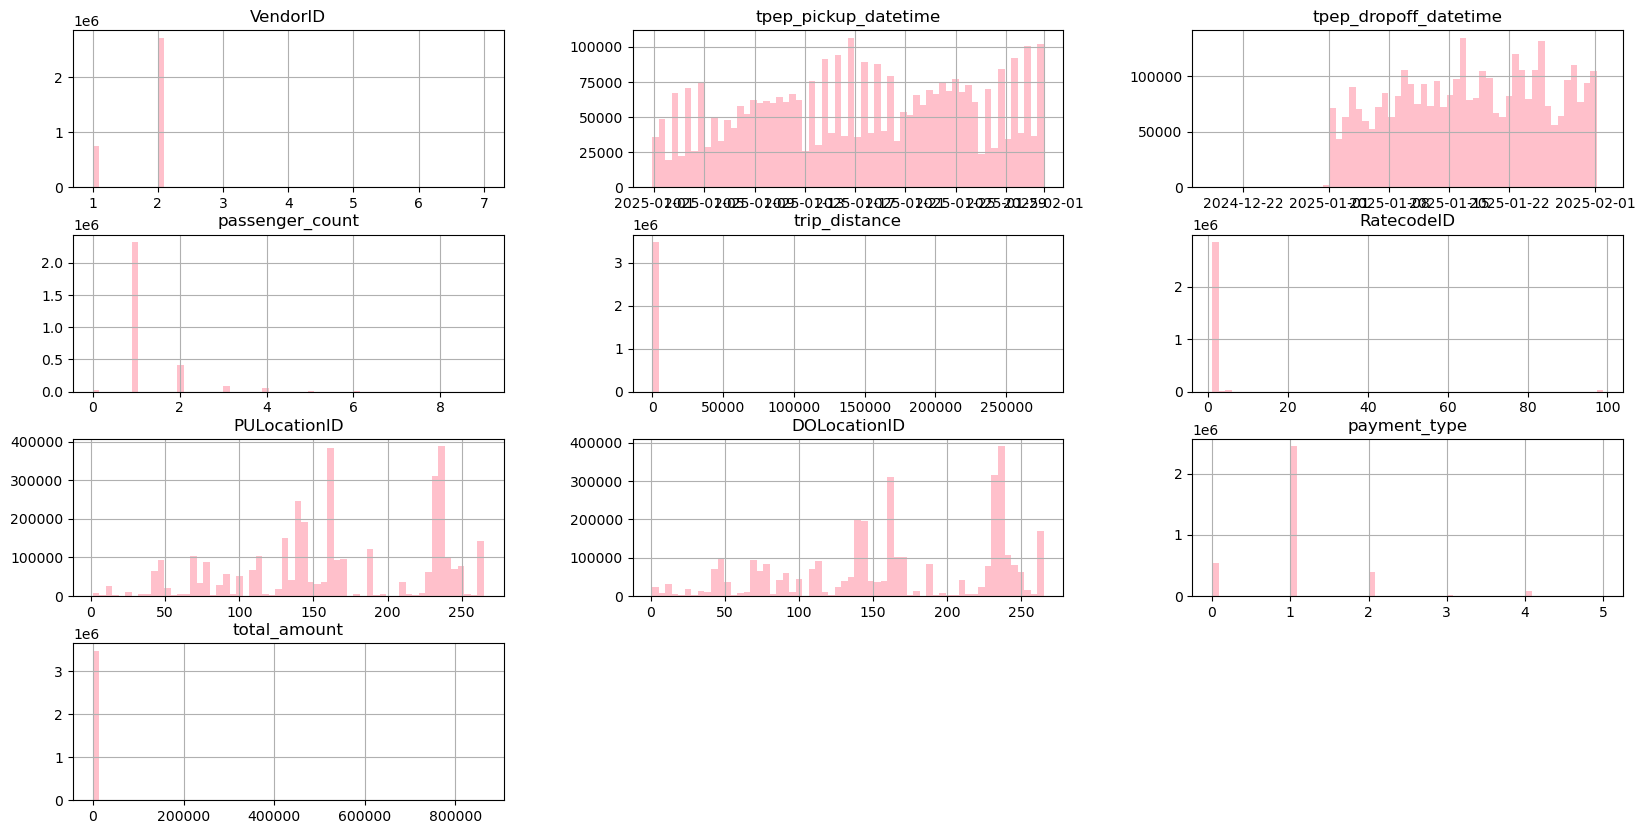

In [19]:
## Plotting using the Historgram
taxi_data.hist(figsize=(20,10), bins=60, color='pink')

In [20]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     2756472
2.0       94420
99.0      41963
5.0       26501
3.0        8622
4.0        7092
6.0           7
Name: count, dtype: int64

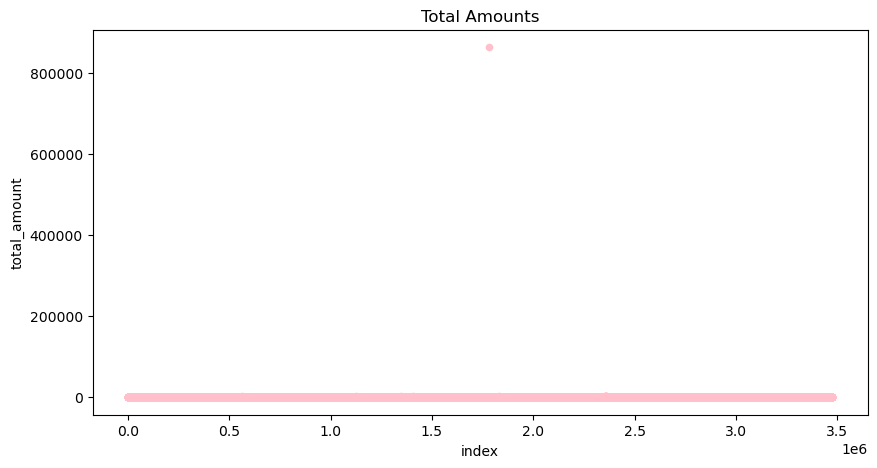

In [21]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5), color='pink')
plt.title("Total Amounts")
plt.show()

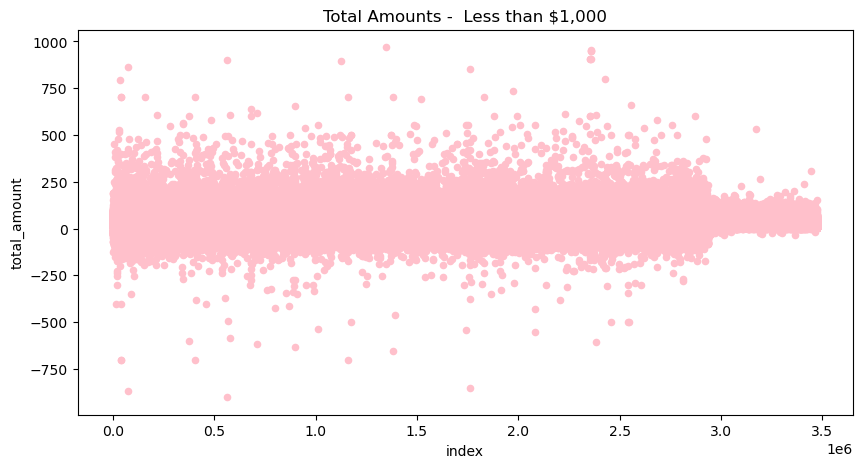

In [22]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter', color='pink', y='total_amount', x='index', figsize=(10,5))
plt.title("Total Amounts -  Less than $1,000")
plt.show()

In [23]:
## Printing the negative values 
print(taxi_data[taxi_data['total_amount']<0].shape)

(63037, 10)


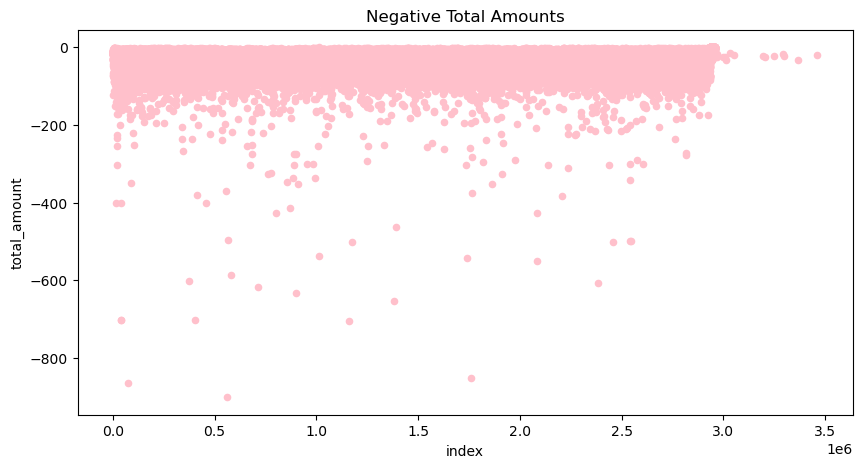

In [24]:
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', color='pink', y='total_amount', x='index', figsize=(10,5))
plt.title("Negative Total Amounts")
plt.show()

In [25]:
taxi_data[taxi_data['total_amount']<0].head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
17,2,2025-01-01 00:01:41,2025-01-01 00:07:14,1.0,0.71,1.0,79,107,2,-8.54
22,2,2025-01-01 00:55:54,2025-01-01 01:00:38,1.0,0.69,1.0,137,233,4,-11.50
104,2,2025-01-01 00:56:12,2025-01-01 01:15:00,1.0,0.97,1.0,161,170,4,-21.30
149,2,2025-01-01 00:55:53,2025-01-01 01:06:49,1.0,1.42,1.0,79,45,2,-17.10
202,2,2025-01-01 00:29:35,2025-01-01 00:36:02,1.0,0.60,1.0,79,148,4,-12.20
212,2,2025-01-01 00:11:44,2025-01-01 00:25:41,2.0,1.88,1.0,79,161,4,-19.20
364,2,2025-01-01 00:11:58,2025-01-01 00:12:31,1.0,0.01,1.0,42,42,4,-5.50
400,2,2025-01-01 00:09:58,2025-01-01 00:14:28,1.0,0.60,1.0,140,263,2,-11.50
492,2,2025-01-01 00:50:13,2025-01-01 01:11:20,1.0,3.84,1.0,48,151,2,-29.00
640,2,2025-01-01 00:51:05,2025-01-01 00:54:12,1.0,0.92,1.0,142,239,2,-11.50


In [26]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
4    37410
2    14111
3     8080
0     3421
1       15
Name: count, dtype: int64

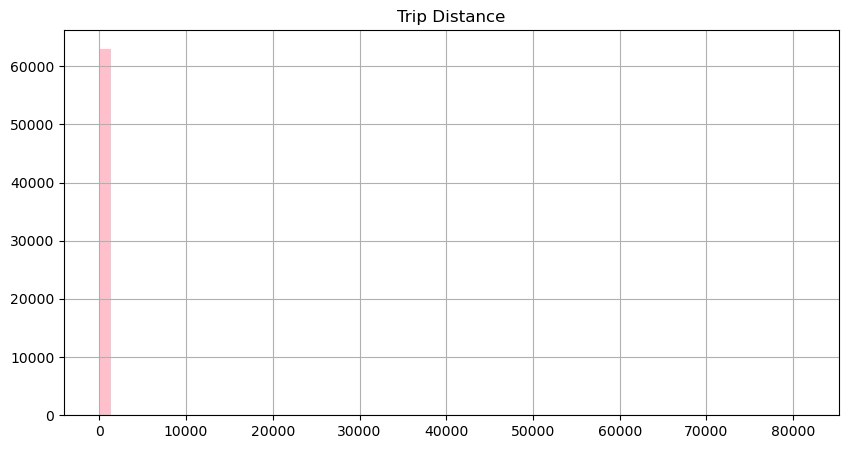

In [27]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5), color='pink')
plt.title("Trip Distance")
plt.show()

In [28]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(559, 10)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
10261,2,2025-01-01 01:30:13,2025-01-01 01:30:31,1.0,0.00,1.0,226,226,2,0.0
18189,1,2025-01-01 03:57:21,2025-01-01 04:02:26,1.0,0.40,1.0,158,125,3,0.0
19155,1,2025-01-01 03:27:25,2025-01-01 03:43:43,1.0,3.50,1.0,144,163,4,0.0
21300,2,2025-01-01 04:03:25,2025-01-01 04:11:42,2.0,4.69,1.0,255,97,2,0.0
21920,2,2025-01-01 04:24:55,2025-01-01 04:29:57,4.0,1.72,1.0,7,7,2,0.0


In [29]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
4    238
3    155
1     78
0     47
2     40
5      1
Name: count, dtype: int64

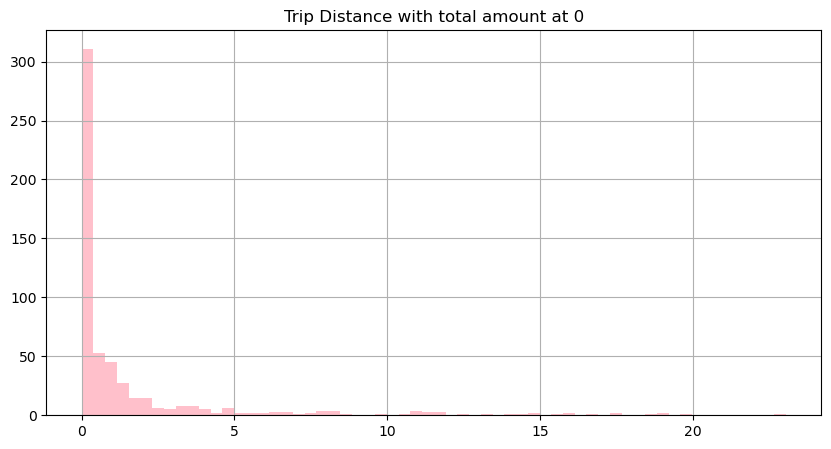

In [30]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5), color='pink')
plt.title("Trip Distance with total amount at 0")
plt.show()

In [31]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     262
0.10      19
0.50      17
0.40      15
0.30      14
        ... 
1.46       1
6.60       1
1.72       1
1.45       1
14.68      1
Name: count, Length: 112, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

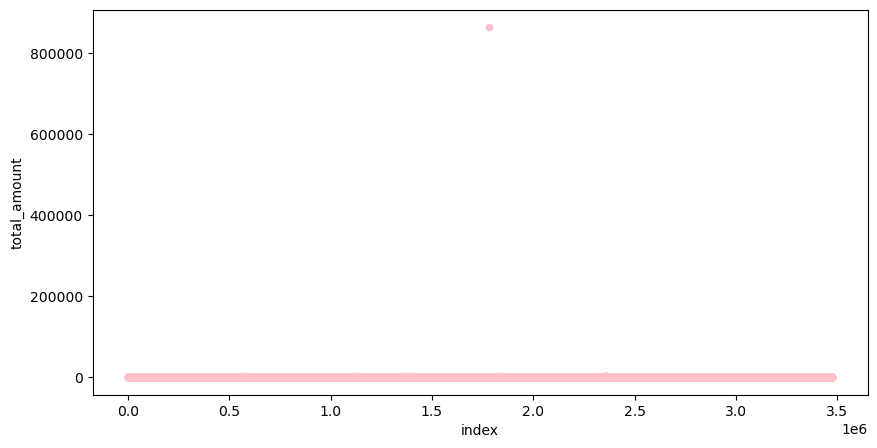

In [32]:
taxi_data.reset_index().plot(kind='scatter', color='pink', y='total_amount', x='index', figsize=(10,5))

In [33]:
taxi_data[taxi_data['total_amount']>200].shape

(1913, 10)

In [34]:
taxi_data['total_amount'].mean()

25.61129169728817

## 3. Data Cleaning

### 3.1 - Handling Invalid Fare Amounts (Negative and Extremely Large Values)

In [37]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0)&(taxi_data['total_amount']<200)]

In [38]:
print(taxi_data.shape)
taxi_data_filtered.shape

(3475226, 10)


(3410271, 10)

In [39]:
taxi_data_filtered.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          536722
trip_distance                 0
RatecodeID               536722
PULocationID                  0
DOLocationID                  0
payment_type                  0
total_amount                  0
dtype: int64

### 3.2 - Investigating Missing or Suspicious Values (Passenger Count & RatecodeID)


In [41]:
taxi_data_filtered[taxi_data_filtered['passenger_count']==0].shape

(24639, 10)

In [42]:
taxi_data_filtered[taxi_data_filtered['passenger_count'].isna()].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
2935077,2,2025-01-01 00:39:17,2025-01-01 01:10:42,NaN,6.75,NaN,48,42,0,14.90
2935078,2,2025-01-01 00:33:40,2025-01-01 01:10:34,NaN,3.88,NaN,4,48,0,10.02
2935079,1,2025-01-01 00:09:32,2025-01-01 00:12:38,NaN,0.00,NaN,158,158,0,26.72
2935080,2,2025-01-01 00:21:42,2025-01-01 00:36:29,NaN,3.55,NaN,137,211,0,5.80
2935081,2,2025-01-01 00:56:04,2025-01-01 01:06:11,NaN,1.55,NaN,140,233,0,9.06


In [43]:
taxi_data_filtered[taxi_data_filtered['passenger_count']==0].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
6,1,2025-01-01 00:14:47,2025-01-01 00:16:15,0.0,0.4,1.0,170,170,1,11.75
7,1,2025-01-01 00:39:27,2025-01-01 00:51:51,0.0,1.6,1.0,234,148,1,19.10
8,1,2025-01-01 00:53:43,2025-01-01 01:13:23,0.0,2.8,1.0,148,170,1,27.10
94,1,2025-01-01 00:11:27,2025-01-01 00:16:58,0.0,0.7,1.0,144,211,1,12.20
95,1,2025-01-01 00:19:30,2025-01-01 00:27:25,0.0,1.0,1.0,211,158,1,17.15


In [44]:
## Removing the null values 
taxi_data_filtered = taxi_data_filtered.dropna(subset=['passenger_count'])
taxi_data_filtered.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

## 4. Data Preparation 

### 4.1 - Copying Dataset for Preparation

In [47]:
# Coping the filtered data frame 
taxi_data_prepared = taxi_data_filtered.copy()

In [48]:
# Checking all data types
taxi_data_prepared.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

In [49]:
# Checking if there are any decimal values in passenger_type
(taxi_data_prepared['passenger_count'] % 1 != 0).sum()

0

### 4.2 - Converting Variables to Appropriate Data Types

In [51]:
taxi_data_prepared['RatecodeID']      = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared['PULocationID']    = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared['DOLocationID']    = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared['payment_type']    = taxi_data_prepared['payment_type'].astype(str)
taxi_data_prepared['passenger_count'] = taxi_data_prepared['passenger_count'].astype(int)

In [52]:
taxi_data_prepared.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                   int32
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [53]:
taxi_data_prepared.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1,1.60,1.0,229,237,1,18.00
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1,0.50,1.0,236,237,1,12.12
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1,0.60,1.0,141,141,1,12.10
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3,0.52,1.0,244,244,2,9.70
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3,0.66,1.0,244,116,2,8.30


### 4.3 - Extracting Data and Time for Income Analysis

In [55]:
taxi_data_prepared['transaction_date']  = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared['transaction_year']  = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day']   = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour']  = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [56]:
taxi_data_prepared.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1,1.60,1.0,229,237,1,18.00,2025-01-01,2025,1,1,0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1,0.50,1.0,236,237,1,12.12,2025-01-01,2025,1,1,0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1,0.60,1.0,141,141,1,12.10,2025-01-01,2025,1,1,0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3,0.52,1.0,244,244,2,9.70,2025-01-01,2025,1,1,0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3,0.66,1.0,244,116,2,8.30,2025-01-01,2025,1,1,0


In [57]:
(taxi_data_prepared['transaction_year']!=2025).sum()

21

In [58]:
taxi_data_prepared[taxi_data_prepared['transaction_year']!=2025].head(21)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
605,2,2024-12-31 23:30:03,2024-12-31 23:43:02,1,3.00,1.0,246,13,1,26.62,2024-12-31,2024,12,31,23
687,2,2024-12-31 23:31:38,2024-12-31 23:41:48,1,1.03,1.0,43,140,2,15.70,2024-12-31,2024,12,31,23
688,2,2024-12-31 23:46:38,2025-01-01 00:03:03,1,3.95,1.0,229,24,2,24.10,2024-12-31,2024,12,31,23
861,2,2024-12-31 23:56:19,2025-01-01 00:11:19,6,2.28,1.0,68,107,1,23.88,2024-12-31,2024,12,31,23
1108,2,2024-12-31 23:55:37,2025-01-01 00:01:26,1,1.12,1.0,56,56,2,10.40,2024-12-31,2024,12,31,23
1312,2,2024-12-31 23:52:40,2025-01-01 00:23:03,1,6.72,1.0,114,151,1,47.40,2024-12-31,2024,12,31,23
2276,2,2024-12-31 23:49:24,2024-12-31 23:57:30,1,2.44,1.0,142,151,1,20.52,2024-12-31,2024,12,31,23
3941,2,2024-12-31 23:27:13,2024-12-31 23:35:48,1,1.53,1.0,170,141,1,18.00,2024-12-31,2024,12,31,23
3942,2,2024-12-31 23:37:42,2024-12-31 23:43:10,1,0.92,1.0,229,141,1,14.03,2024-12-31,2024,12,31,23
4324,2,2024-12-31 23:51:20,2025-01-01 00:00:00,1,12.89,1.0,138,40,1,69.30,2024-12-31,2024,12,31,23


In [59]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2025]
(taxi_data_prepared['transaction_year']!=2025).sum()

0

In [60]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]
(taxi_data_prepared['transaction_month']!=1).sum()

0

In [61]:
taxi_data_prepared.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'total_amount', 'transaction_date',
       'transaction_year', 'transaction_month', 'transaction_day',
       'transaction_hour'],
      dtype='object')

### 4.4 - Aggergating Data by Time and Region

In [63]:
categorical_columns = ['PULocationID', 'transaction_date', 'transaction_month', 'transaction_day',
       'transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [64]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(2873527, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,229,2025-01-01,1,1,0,1.60,18.00
1,236,2025-01-01,1,1,0,0.50,12.12
2,141,2025-01-01,1,1,0,0.60,12.10
3,244,2025-01-01,1,1,0,0.52,9.70
4,244,2025-01-01,1,1,0,0.66,8.30


In [65]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index() 
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']

In [66]:
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(75880, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2025-01-01,1,1,6,0.100000,115.000,1
1,1,2025-01-01,1,1,9,0.000000,132.510,4
2,1,2025-01-01,1,1,12,0.000000,106.200,2
3,1,2025-01-01,1,1,13,1.333333,56.400,3
4,1,2025-01-01,1,1,14,2.160000,70.205,2


## 5. Benchmark Model

### 5.1 - Setting Up Inputs for the Benchmark Model

In [69]:
data_for_benchmark_model = taxi_grouped_by_region.copy()
data_for_benchmark_model.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2025-01-01,1,1,6,0.100000,115.000,1
1,1,2025-01-01,1,1,9,0.000000,132.510,4
2,1,2025-01-01,1,1,12,0.000000,106.200,2
3,1,2025-01-01,1,1,13,1.333333,56.400,3
4,1,2025-01-01,1,1,14,2.160000,70.205,2


In [70]:
# Dropped the transcation_date
categorical_features_benchmark = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']

# input_features_benchmark contains all the features used to train the model
input_features_benchmark  = categorical_features_benchmark + ['trip_distance']

# target_feature_benchmark is the value the model will try to predict
target_features_benchmark = 'total_amount'

### 5.2 - Train-Test Split

In [72]:
# Import library to train and test model
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_features_benchmark]

# one-hot encoding
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size = 0.33, random_state = 42)

In [73]:
print("X_train shape:", X_train_b.shape)
print("X_test shape:", X_test_b.shape)
print("y_train shape:", y_train_b.shape)
print("y_test shape:", y_test_b.shape)

X_train shape: (50839, 260)
X_test shape: (25041, 260)
y_train shape: (50839,)
y_test shape: (25041,)


In [74]:
train_rows = set(X_train_b.index)
test_rows = set(X_test_b.index)
overlap = train_rows.intersection(test_rows)

print("Overlap:", len(overlap))

Overlap: 0


### 5.3 - Fit a Model to the Data

In [76]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

### 5.4 - Model Evaluation

In [78]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('Mean Absolute Error: ', mean_absolute_error(y_test_b, y_pred_b))
print('Mean Squared Error: ', mean_squared_error(y_test_b, y_pred_b))
print('Root Mean Squared Error: ', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('R2: ', r2_score(y_test_b, y_pred_b))


Mean Absolute Error:  6.734087113028918
Mean Squared Error:  184.5886357289762
Root Mean Squared Error:  13.586340041710136
R2:  0.5721831424184323


<Axes: xlabel='true', ylabel='pred'>

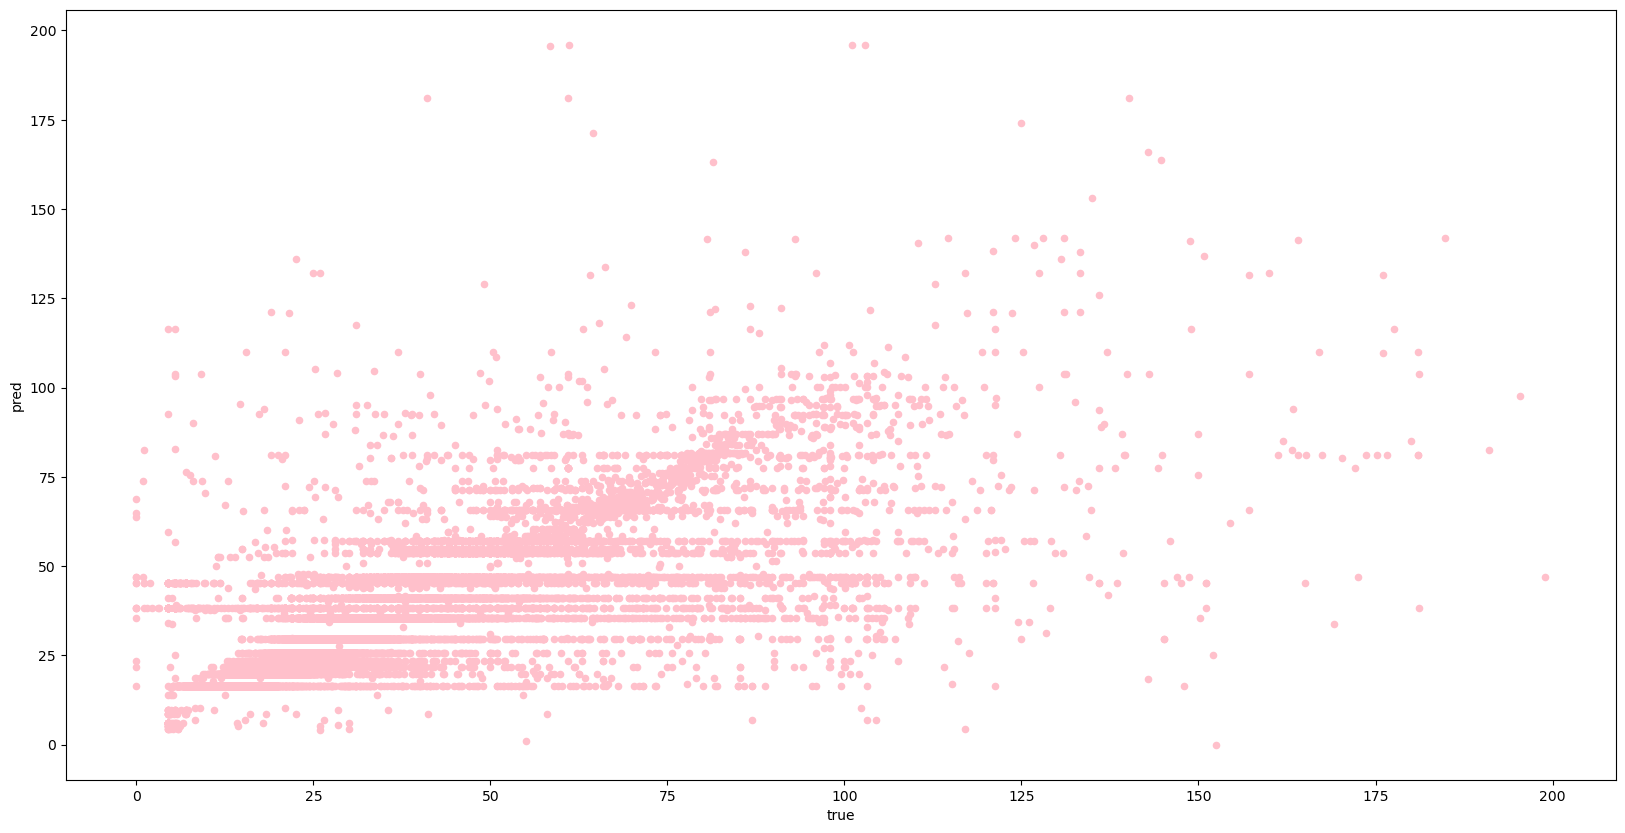

In [79]:
data = {'true':y_test_b, 'pred':y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter',color='pink', x='true', y='pred')


### 5.5 - Fixing Problem


In [81]:
categorical_features_benchmark = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']

# input_features_benchmark contains all the features used to train the model without the trip distance
input_features_benchmark  = categorical_features_benchmark
target_feature_benchmark = 'total_amount'

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

X_Bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('Mean Absolute Error: ', mean_absolute_error(y_test_b, y_pred_b))
print('Mean Squared Error: ', mean_squared_error(y_test_b, y_pred_b))
print('Root Mean Squared Error: ', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('R2: ', r2_score(y_test_b, y_pred_b))


Mean Absolute Error:  6.734087113028918
Mean Squared Error:  184.5886357289762
Root Mean Squared Error:  13.586340041710136
R2:  0.5721831424184323


### 6 - Feature Engineering

In [83]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2025-01-01,1,1,6,0.100000,115.000,1
1,1,2025-01-01,1,1,9,0.000000,132.510,4
2,1,2025-01-01,1,1,12,0.000000,106.200,2
3,1,2025-01-01,1,1,13,1.333333,56.400,3
4,1,2025-01-01,1,1,14,2.160000,70.205,2


In [84]:
# Copy original grouped data for safe feature engineering
data_with_new_features = taxi_grouped_by_region.copy()

In [85]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x==5 or x==6 else False)

#### 6.1 - Weekend and holiday feature engineering

In [87]:
# Add federal holiday feature using pandas time series tools
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = pd.to_datetime(cal.holidays(start='2018', end='2025'))
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

In [88]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2025-01-01,1,1,6,0.100000,115.000,1,2,False,True
1,1,2025-01-01,1,1,9,0.000000,132.510,4,2,False,True
2,1,2025-01-01,1,1,12,0.000000,106.200,2,2,False,True
3,1,2025-01-01,1,1,13,1.333333,56.400,3,2,False,True
4,1,2025-01-01,1,1,14,2.160000,70.205,2,2,False,True


In [89]:
# Load and prepare zone lookup table
zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID', 'Borough']]
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [90]:
# Load and prepare zone lookup table
data_with_new_features['PULocationID'] = data_with_new_features['PULocationID'].astype(int)

# Now merge
data_with_new_features = data_with_new_features.merge(
    zone_lookup, left_on='PULocationID', right_on='LocationID', how='left'
)

# Drop the extra 'LocationID' column if needed
data_with_new_features.drop('LocationID', axis=1, inplace=True)

# Check result
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2025-01-01,1,1,6,0.100000,115.000,1,2,False,True,EWR
1,1,2025-01-01,1,1,9,0.000000,132.510,4,2,False,True,EWR
2,1,2025-01-01,1,1,12,0.000000,106.200,2,2,False,True,EWR
3,1,2025-01-01,1,1,13,1.333333,56.400,3,2,False,True,EWR
4,1,2025-01-01,1,1,14,2.160000,70.205,2,2,False,True,EWR


In [91]:
# Quick check of distribution across boroughs
data_with_new_features['Borough'].value_counts()

Borough
Manhattan        41416
Brooklyn         14112
Queens           13682
Bronx             5128
Unknown            685
EWR                230
Staten Island       83
Name: count, dtype: int64

#### 6.2 - Weather data integration

In [93]:
# Load NYC weather data for January 2025
nyc_weather = pd.read_csv('data/New York, NY-weather -2025-01-01 to 2025-01-31.csv')
nyc_weather.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"New York, NY, United States",2025-01-01T00:00:00,46.2,41.6,42.8,87.86,0.000,0,NaN,0.0,...,998.7,98.1,8.8,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7..."
1,"New York, NY, United States",2025-01-01T01:00:00,45.6,45.6,42.9,90.26,0.036,100,rain,0.0,...,998.2,100.0,7.3,0,0.0,0,NaN,"Rain, Overcast",rain,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7..."
2,"New York, NY, United States",2025-01-01T02:00:00,45.4,43.9,42.9,90.76,0.000,0,NaN,0.0,...,997.9,100.0,6.6,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7..."
3,"New York, NY, United States",2025-01-01T03:00:00,45.3,45.3,42.5,89.75,0.000,0,NaN,0.0,...,998.2,93.1,5.5,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7..."
4,"New York, NY, United States",2025-01-01T04:00:00,46.7,45.6,43.6,89.01,0.000,0,NaN,0.0,...,997.9,100.0,6.2,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7..."


In [94]:
nyc_weather.shape

(744, 24)

In [95]:
nyc_weather.dtypes

name                 object
datetime             object
temp                float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir               int64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation        int64
solarenergy         float64
uvindex               int64
severerisk          float64
conditions           object
icon                 object
stations             object
dtype: object

In [96]:
nyc_weather.describe()

,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,0.0
mean,31.719355,24.021909,13.943414,48.902863,0.000780,4.166667,0.001008,0.074772,20.129167,9.939651,264.848118,1014.597849,48.074462,9.490860,91.345430,0.327554,0.905914,NaN
std,7.877785,10.223781,10.452104,14.210621,0.004871,19.996074,0.016413,0.349039,9.763519,4.703027,63.824771,8.588972,35.971415,1.488691,162.143666,0.583839,1.628074,NaN
min,11.300000,-3.000000,-7.200000,21.100000,0.000000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,996.000000,0.000000,0.600000,0.000000,0.000000,0.000000,NaN
25%,27.000000,17.300000,6.900000,39.435000,0.000000,0.000000,0.000000,0.000000,11.200000,6.700000,250.000000,1008.500000,14.100000,9.900000,0.000000,0.000000,0.000000,NaN
50%,31.300000,23.300000,13.050000,45.400000,0.000000,0.000000,0.000000,0.000000,20.800000,9.350000,281.000000,1014.500000,34.200000,9.900000,0.000000,0.000000,0.000000,NaN
75%,37.800000,31.800000,19.600000,54.310000,0.000000,0.000000,0.000000,0.000000,28.250000,13.025000,302.000000,1019.825000,89.500000,9.900000,104.500000,0.400000,1.000000,NaN
max,51.900000,51.900000,43.800000,90.760000,0.059000,100.000000,0.430000,2.610000,42.600000,25.900000,360.000000,1036.100000,100.000000,9.900000,659.000000,2.400000,7.000000,NaN


#### 6.3 - Weather Data Cleaning

In [98]:
nyc_weather = nyc_weather.drop(columns=['name','icon','stations','dew','sealevelpressure','precipprob','severerisk','solarradiation','solarenergy','uvindex'])

In [99]:
nyc_weather.columns

Index(['datetime', 'temp', 'feelslike', 'humidity', 'precip', 'preciptype',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'cloudcover',
       'visibility', 'conditions'],
      dtype='object')

In [100]:
nyc_weather.isna().sum()

datetime        0
temp            0
feelslike       0
humidity        0
precip          0
preciptype    708
snow            0
snowdepth       0
windgust        0
windspeed       0
winddir         0
cloudcover      0
visibility      0
conditions      0
dtype: int64

In [101]:
nyc_weather['preciptype'].value_counts()

preciptype
rain,snow    19
rain         16
snow          1
Name: count, dtype: int64

In [102]:
nyc_weather = nyc_weather.drop(columns=['preciptype'])

In [103]:
nyc_weather.isna().sum()

datetime      0
temp          0
feelslike     0
humidity      0
precip        0
snow          0
snowdepth     0
windgust      0
windspeed     0
winddir       0
cloudcover    0
visibility    0
conditions    0
dtype: int64

In [104]:
for col in nyc_weather.columns:
    print(f'\nValue Count for Columns: {col}')
    print(nyc_weather[col].value_counts(),'\n\n')


Value Count for Columns: datetime
datetime
2025-01-01T00:00:00    1
2025-01-21T19:00:00    1
2025-01-21T10:00:00    1
2025-01-21T11:00:00    1
2025-01-21T12:00:00    1
                      ..
2025-01-11T10:00:00    1
2025-01-11T11:00:00    1
2025-01-11T12:00:00    1
2025-01-11T13:00:00    1
2025-01-31T23:00:00    1
Name: count, Length: 744, dtype: int64 



Value Count for Columns: temp
temp
28.5    20
27.4    12
28.3    11
36.2    11
31.1    10
        ..
46.1     1
27.1     1
31.2     1
37.2     1
47.3     1
Name: count, Length: 253, dtype: int64 



Value Count for Columns: feelslike
feelslike
22.4    10
23.3     8
18.4     7
33.6     6
33.0     6
        ..
16.5     1
19.4     1
39.0     1
38.0     1
43.3     1
Name: count, Length: 341, dtype: int64 



Value Count for Columns: humidity
humidity
43.72    4
46.45    3
54.64    3
42.17    3
43.24    3
        ..
66.99    1
61.11    1
57.47    1
55.37    1
87.77    1
Name: count, Length: 663, dtype: int64 



Value Count for Columns

In [105]:
nyc_weather.dtypes

datetime       object
temp          float64
feelslike     float64
humidity      float64
precip        float64
snow          float64
snowdepth     float64
windgust      float64
windspeed     float64
winddir         int64
cloudcover    float64
visibility    float64
conditions     object
dtype: object

In [106]:
nyc_weather['conditions'].value_counts()

conditions
Partially cloudy          312
Clear                     250
Overcast                  151
Rain, Overcast             15
Snow, Rain, Overcast       15
Rain, Partially cloudy      1
Name: count, dtype: int64

In [107]:
print(nyc_weather['datetime'].dtype)

object


In [108]:
# Change datatime type 
nyc_weather['datetime'] = pd.to_datetime(nyc_weather['datetime'])

In [109]:
print(nyc_weather['datetime'].dtype)

datetime64[ns]


In [110]:
#Splitting hour month and day
nyc_weather['hour'] = nyc_weather['datetime'].dt.hour
nyc_weather['month'] = nyc_weather['datetime'].dt.month
nyc_weather['day'] = nyc_weather['datetime'].dt.day

In [111]:
# One Hot encoding

nyc_weather_encoded = pd.get_dummies(nyc_weather, columns = ['conditions'])

In [112]:
nyc_weather_encoded.columns

Index(['datetime', 'temp', 'feelslike', 'humidity', 'precip', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'cloudcover',
       'visibility', 'hour', 'month', 'day', 'conditions_Clear',
       'conditions_Overcast', 'conditions_Partially cloudy',
       'conditions_Rain, Overcast', 'conditions_Rain, Partially cloudy',
       'conditions_Snow, Rain, Overcast'],
      dtype='object')

In [113]:
nyc_weather_encoded.dtypes

datetime                             datetime64[ns]
temp                                        float64
feelslike                                   float64
humidity                                    float64
precip                                      float64
snow                                        float64
snowdepth                                   float64
windgust                                    float64
windspeed                                   float64
winddir                                       int64
cloudcover                                  float64
visibility                                  float64
hour                                          int32
month                                         int32
day                                           int32
conditions_Clear                               bool
conditions_Overcast                            bool
conditions_Partially cloudy                    bool
conditions_Rain, Overcast                      bool
conditions_R

#### 6.4 - Merging datasets

In [115]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2025-01-01,1,1,6,0.100000,115.000,1,2,False,True,EWR
1,1,2025-01-01,1,1,9,0.000000,132.510,4,2,False,True,EWR
2,1,2025-01-01,1,1,12,0.000000,106.200,2,2,False,True,EWR
3,1,2025-01-01,1,1,13,1.333333,56.400,3,2,False,True,EWR
4,1,2025-01-01,1,1,14,2.160000,70.205,2,2,False,True,EWR


In [116]:
nyc_taxi_with_weather = data_with_new_features.merge(nyc_weather_encoded, left_on = ['transaction_month', 'transaction_day', 'transaction_hour'], right_on = ['month', 'day', 'hour'], how = 'left')

print(nyc_taxi_with_weather.shape)

(75880, 33)


In [117]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,visibility,hour,month,day,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy","conditions_Snow, Rain, Overcast"
0,1,2025-01-01,1,1,6,0.100000,115.000,1,2,False,...,7.4,6,1,1,False,True,False,False,False,False
1,1,2025-01-01,1,1,9,0.000000,132.510,4,2,False,...,9.8,9,1,1,False,False,True,False,False,False
2,1,2025-01-01,1,1,12,0.000000,106.200,2,2,False,...,9.9,12,1,1,False,True,False,False,False,False
3,1,2025-01-01,1,1,13,1.333333,56.400,3,2,False,...,9.9,13,1,1,False,True,False,False,False,False
4,1,2025-01-01,1,1,14,2.160000,70.205,2,2,False,...,9.9,14,1,1,False,True,False,False,False,False


In [118]:
nyc_taxi_with_weather = nyc_taxi_with_weather.drop(['datetime', 'hour', 'day', 'month'], axis=1)

In [119]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,windspeed,winddir,cloudcover,visibility,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy","conditions_Snow, Rain, Overcast"
0,1,2025-01-01,1,1,6,0.100000,115.000,1,2,False,...,9.4,246,97.5,7.4,False,True,False,False,False,False
1,1,2025-01-01,1,1,9,0.000000,132.510,4,2,False,...,8.4,252,88.8,9.8,False,False,True,False,False,False
2,1,2025-01-01,1,1,12,0.000000,106.200,2,2,False,...,12.7,276,95.7,9.9,False,True,False,False,False,False
3,1,2025-01-01,1,1,13,1.333333,56.400,3,2,False,...,14.4,268,95.7,9.9,False,True,False,False,False,False
4,1,2025-01-01,1,1,14,2.160000,70.205,2,2,False,...,14.8,262,95.7,9.9,False,True,False,False,False,False


In [120]:
nyc_taxi_with_weather.isna().sum()

PULocationID                           0
transaction_date                       0
transaction_month                      0
transaction_day                        0
transaction_hour                       0
trip_distance                          0
total_amount                           0
count_of_transactions                  0
transaction_week_day                   0
weekend                                0
is_holiday                             0
Borough                              544
temp                                   0
feelslike                              0
humidity                               0
precip                                 0
snow                                   0
snowdepth                              0
windgust                               0
windspeed                              0
winddir                                0
cloudcover                             0
visibility                             0
conditions_Clear                       0
conditions_Overc

In [121]:
nyc_taxi_with_weather = nyc_taxi_with_weather.dropna(subset=['Borough'])

In [122]:
nyc_taxi_with_weather.isna().sum()

PULocationID                         0
transaction_date                     0
transaction_month                    0
transaction_day                      0
transaction_hour                     0
trip_distance                        0
total_amount                         0
count_of_transactions                0
transaction_week_day                 0
weekend                              0
is_holiday                           0
Borough                              0
temp                                 0
feelslike                            0
humidity                             0
precip                               0
snow                                 0
snowdepth                            0
windgust                             0
windspeed                            0
winddir                              0
cloudcover                           0
visibility                           0
conditions_Clear                     0
conditions_Overcast                  0
conditions_Partially clou

### 7 - Model Training

#### 7.1 - Organizing Categorical, Input and Target

In [125]:
data_for_model = nyc_taxi_with_weather.copy()

In [126]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour', 'transaction_week_day', 
                        'weekend', 'is_holiday', 'Borough']

input_features = categorical_features + ['temp', 'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']

target_features = 'total_amount'

#### 7.2 - Train-test split

In [128]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_features]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [129]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [130]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', sqrt(mean_squared_error(y_test, y_pred)))
print('r2: ', r2_score(y_test, y_pred))

Mean Absolute Error:  9.485645313724119
Mean Squared Error:  251.10083756098624
Root Mean Squared Error:  15.846161603397405
r2:  0.36701821129404555


<Axes: xlabel='true', ylabel='pred'>

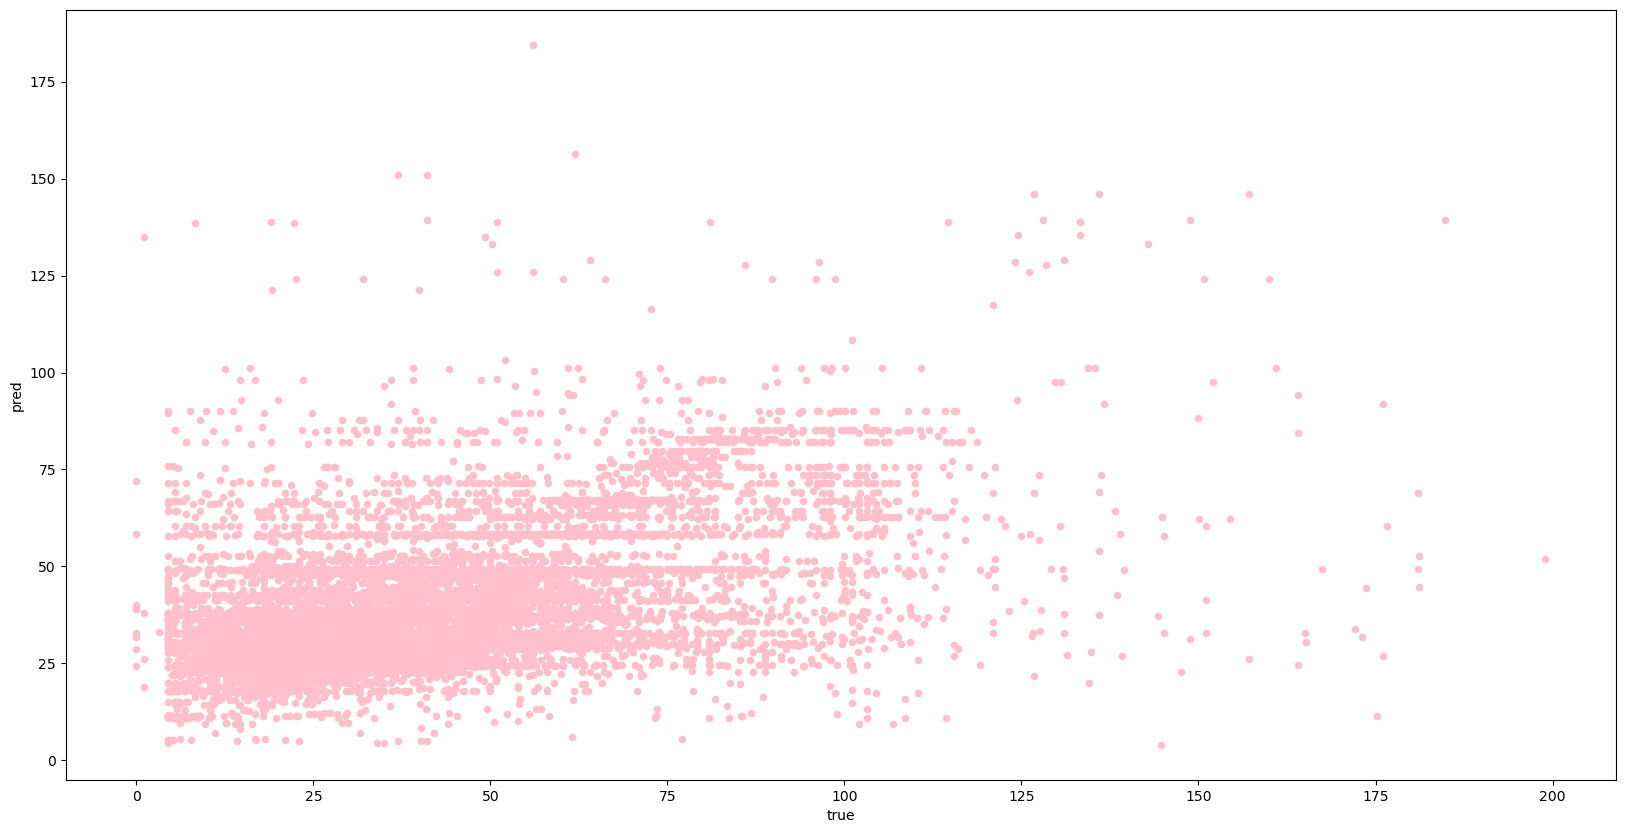

In [131]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter',color='pink', x='true', y='pred')

#### 7.3 - Overfit

In [133]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test

In [134]:
rmse_scores = {'max_depth':[], 'rmse_train':[], 'rmse_test':[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)

    model_at_hand_overfit = decision_tree_overfit
    
    y_pred_train = model_at_hand_overfit.predict(X_train_overfit)
    rmse_train =sqrt(mean_squared_error(y_train_overfit, y_pred_train))
    
    y_pred_test = model_at_hand_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
    
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

2
5
8
10
15
20
30
50
70
100
150


Text(0, 0.5, 'root mean squared error')

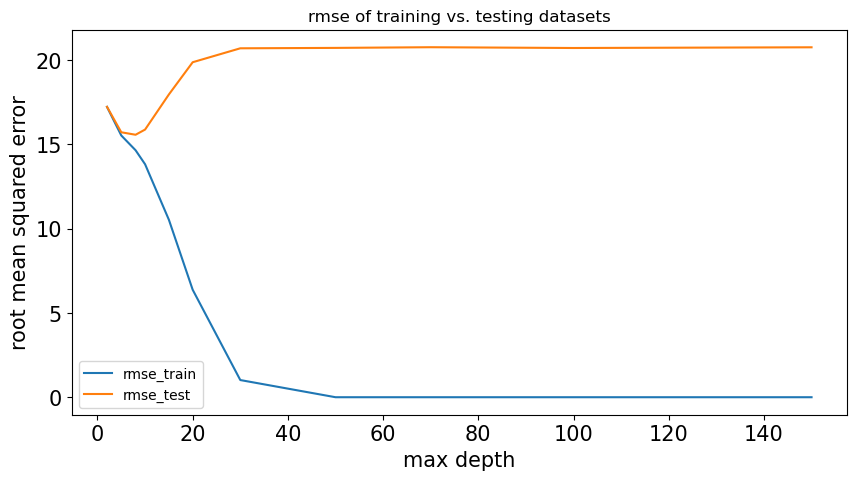

In [135]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10,5),title="rmse of training vs. testing datasets", fontsize=15, x='max_depth')
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)

In [136]:
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,1.722254e+01,17.227123
1,5,1.552652e+01,15.717299
2,8,1.465165e+01,15.570179
3,10,1.382024e+01,15.878112
4,15,1.052597e+01,17.961247
5,20,6.374232e+00,19.872711
6,30,1.018846e+00,20.698845
7,50,1.551395e-16,20.722642
8,70,1.551395e-16,20.762637
9,100,1.551395e-16,20.716498


#### 7.4 - Underfit

In [138]:
X_train_underfit = X_train
y_train_underfit = y_train

X_test_underfit = X_test
y_test_underfit = y_test

In [139]:
decision_tree_underfit = DecisionTreeRegressor(max_depth=1)
decision_tree_underfit.fit(X_train_underfit, y_train_underfit)

#Training performance

model_at_hand_underfit = decision_tree_underfit

y_pred_underfit = model_at_hand_underfit.predict(X_train_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('Mean Absolute Error: ', mean_absolute_error(y_train_underfit, y_pred_underfit))
print('Mean Squared Error: ', mean_squared_error(y_train_underfit, y_pred_underfit))
print('Root Mean Squared Error: ', sqrt(mean_squared_error(y_train_underfit, y_pred_underfit)))
print('r2: ', r2_score(y_train_underfit, y_pred_underfit))


Mean Absolute Error:  11.988737863821122
Mean Squared Error:  320.26656690852724
Root Mean Squared Error:  17.895993040581104
r2:  0.18834535025014054


In [140]:

#Testing performance

y_pred_underfit = model_at_hand_underfit.predict(X_test_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('Mean Absolute Error: ', mean_absolute_error(y_test_underfit, y_pred_underfit))
print('Mean Squared Error: ', mean_squared_error(y_test_underfit, y_pred_underfit))
print('Root Mean Squared Error: ', sqrt(mean_squared_error(y_test_underfit, y_pred_underfit)))
print('r2: ', r2_score(y_test_underfit, y_pred_underfit))


Mean Absolute Error:  11.993797232514158
Mean Squared Error:  319.85355953093267
Root Mean Squared Error:  17.884450216065705
r2:  0.19370448859341882


#### 7.5 - Random Forest

In [142]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

RandomForestRegressor()

In [143]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt


print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', sqrt(mean_squared_error(y_test, y_pred)))
print('R2: ', r2_score(y_test, y_pred))

Mean Absolute Error:  9.193691671358298
Mean Squared Error:  241.55539917912893
Root Mean Squared Error:  15.542052605081766
R2:  0.3910806107651864


<Axes: xlabel='true', ylabel='pred'>

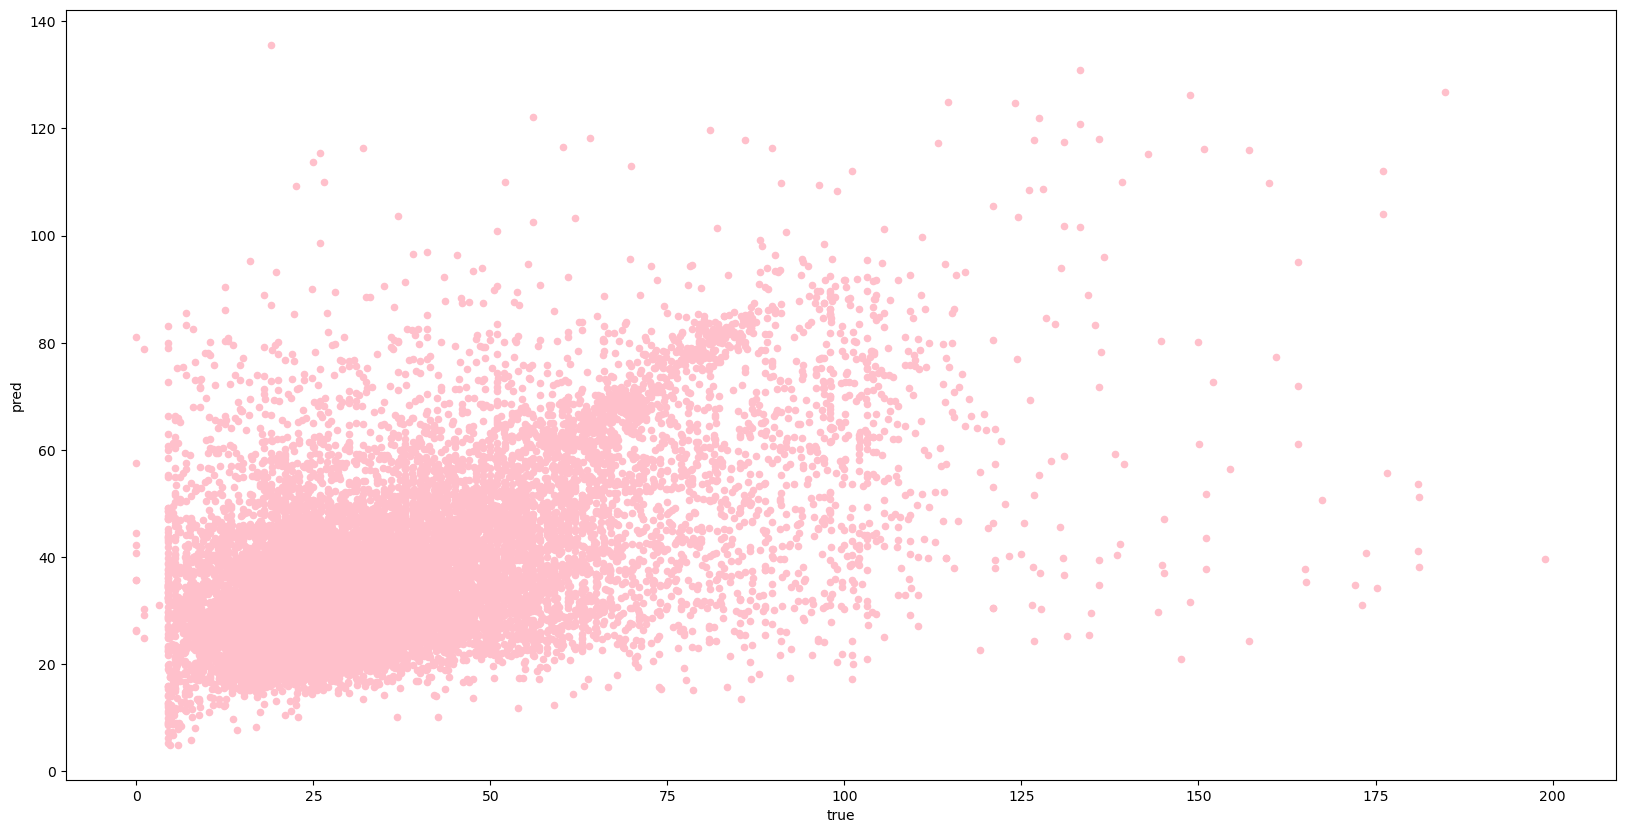

In [144]:
data = {'true': y_test, 'pred':y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter',color='pink', x='true', y='pred')

#### 7.6 - Gradient Boosting

In [146]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)


GradientBoostingRegressor()

In [147]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', sqrt(mean_squared_error(y_test, y_pred)))
print('R2: ', r2_score(y_test, y_pred))

Mean Absolute Error:  9.571177100637303
Mean Squared Error:  236.7846945677793
Root Mean Squared Error:  15.387809934093262
R2:  0.4031067320940187


<Axes: xlabel='true', ylabel='pred'>

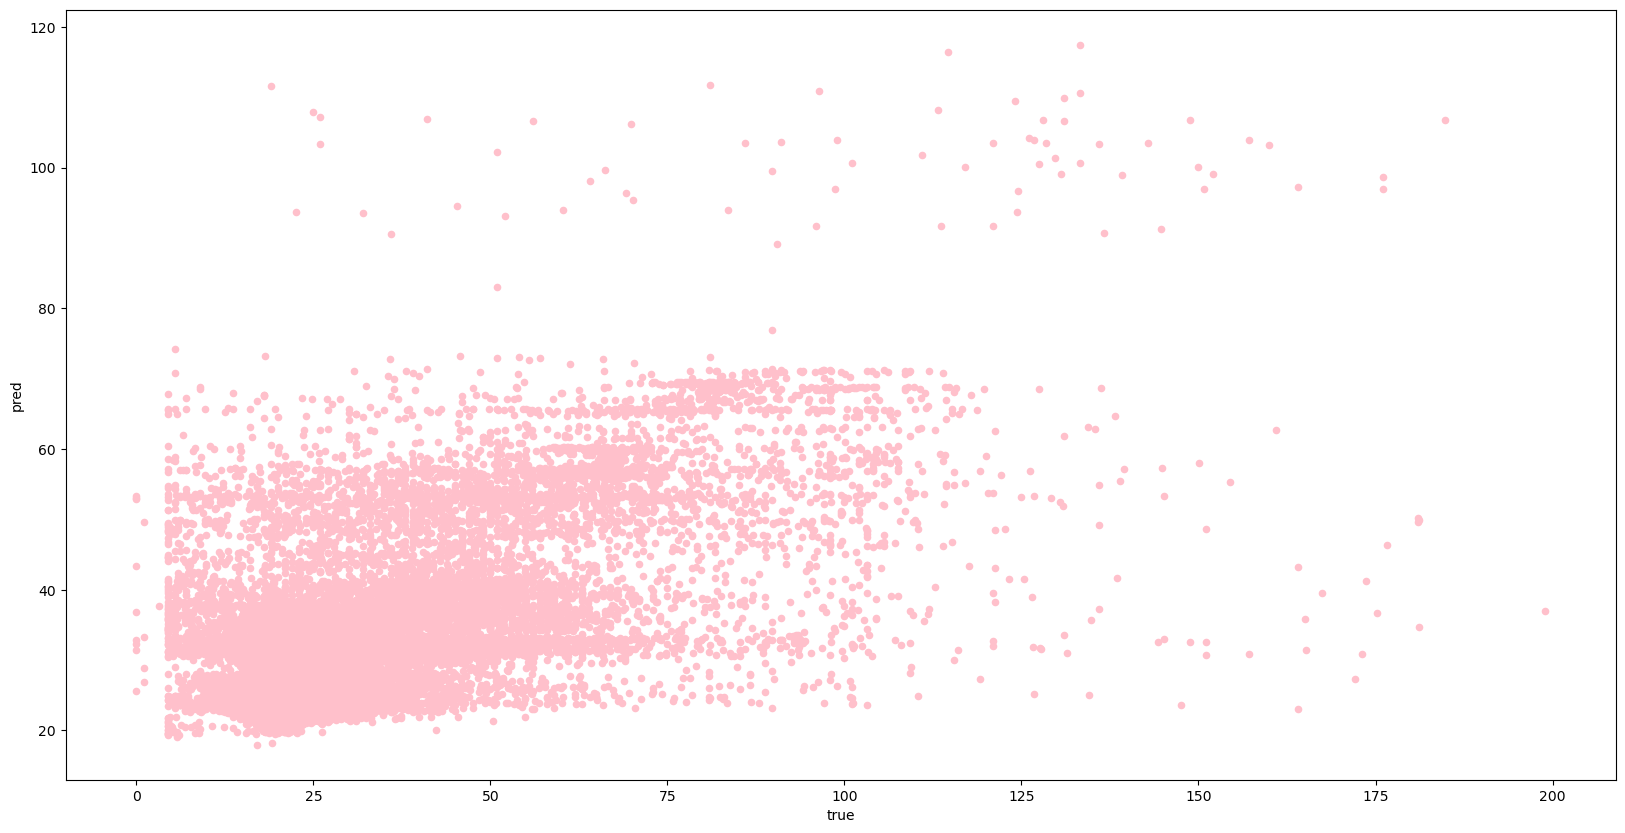

In [148]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', color='pink', x='true', y='pred')

<Axes: >

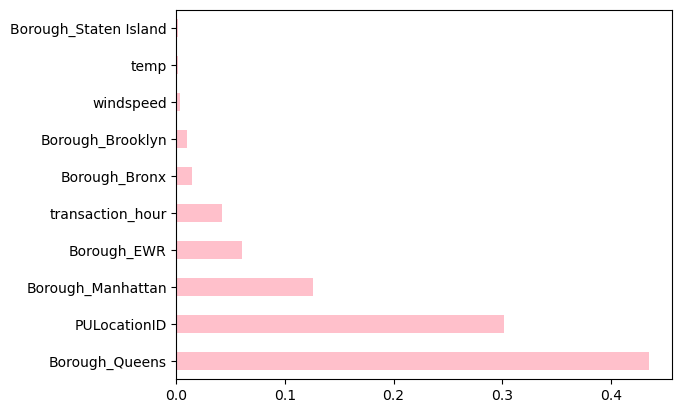

In [149]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
 .nlargest(10)
 .plot(kind='barh', color='pink'))

#### 7.7 Comparing Algorithm Performances

|     Algorithm     |   MAE  |   RMSE  |   R2   |
|-------------------|--------|---------|--------|
|   Decision Tree   | 9.4816 | 15.8451 | 0.3671 |
|   Random Forest   | 9.1832 | 15.5421 | 0.3911 |
| Gradient Boosting | 9.5715 | 15.3879 | 0.4030 |

### 8 - Tuning

#### 8.1 - Find best parameters